- n = [800, 1200, 2000] / 400

- indp = N
- z_dis = gaussian, uniform
- noise_dis = gaussian, t, cauchy
- dz=1
- alpha=2

In [2]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


def ecit_simu(n_list=[400,800,2000,4000],
              t=100,
              cit=kcit,
              ensembles=[(p_alpha175,1), (p_alpha175,2), (p_alpha175,400)],
              show_progress=True,
              dz=1,n_indp='N',z_dis='gaussian',noise_dis='gaussian',noise_std=0.3,fun1=None,fun2=None):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k>1 else print(f"Default (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)

        for i, n in enumerate(n_list):

            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"n={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for sed in iteration_loop:
                np.random.seed(sed)
                random.seed(sed)
                dataI = np.hstack((generate_samples(n=n,dz=dz,indp='C',z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                    fun1=fun1, fun2=fun1)))
                dataII = np.hstack((generate_samples(n=n,dz=dz,indp=n_indp,z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                     fun1=fun1, fun2=fun1)))
                obj_ECIT = ECIT(dataI, cit, p_ensemble, k if k<100 else int(n/k))
                pI = obj_ECIT([0], [1], [2])
                obj_ECIT = ECIT(dataII, cit, p_ensemble, k if k<100 else int(n/k))
                pII = obj_ECIT([0], [1], [2])
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append([eI, eII, tim])

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        key_name = f"Ensemble (k={k}, {p_ensemble.__name__})" if k > 1 else f"Default (k=1)"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = np.array(eI) + np.array(eII)

        ax_eI.plot(n_list, eI, label=label)
        ax_eII.plot(n_list, eII)
        ax_eSum.plot(n_list, eSum)
        ax_tim.plot(n_list, tim)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

/Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
n_list = [800, 1200, 2000]
ensembles = [(p_alpha2, 1), (p_alpha2, 400)]#, (p_alpha2, 200)]
t = 1000
cit = rcit

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [05:10<00:00,  3.22it/s]


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [21:52<00:00,  1.31s/it]


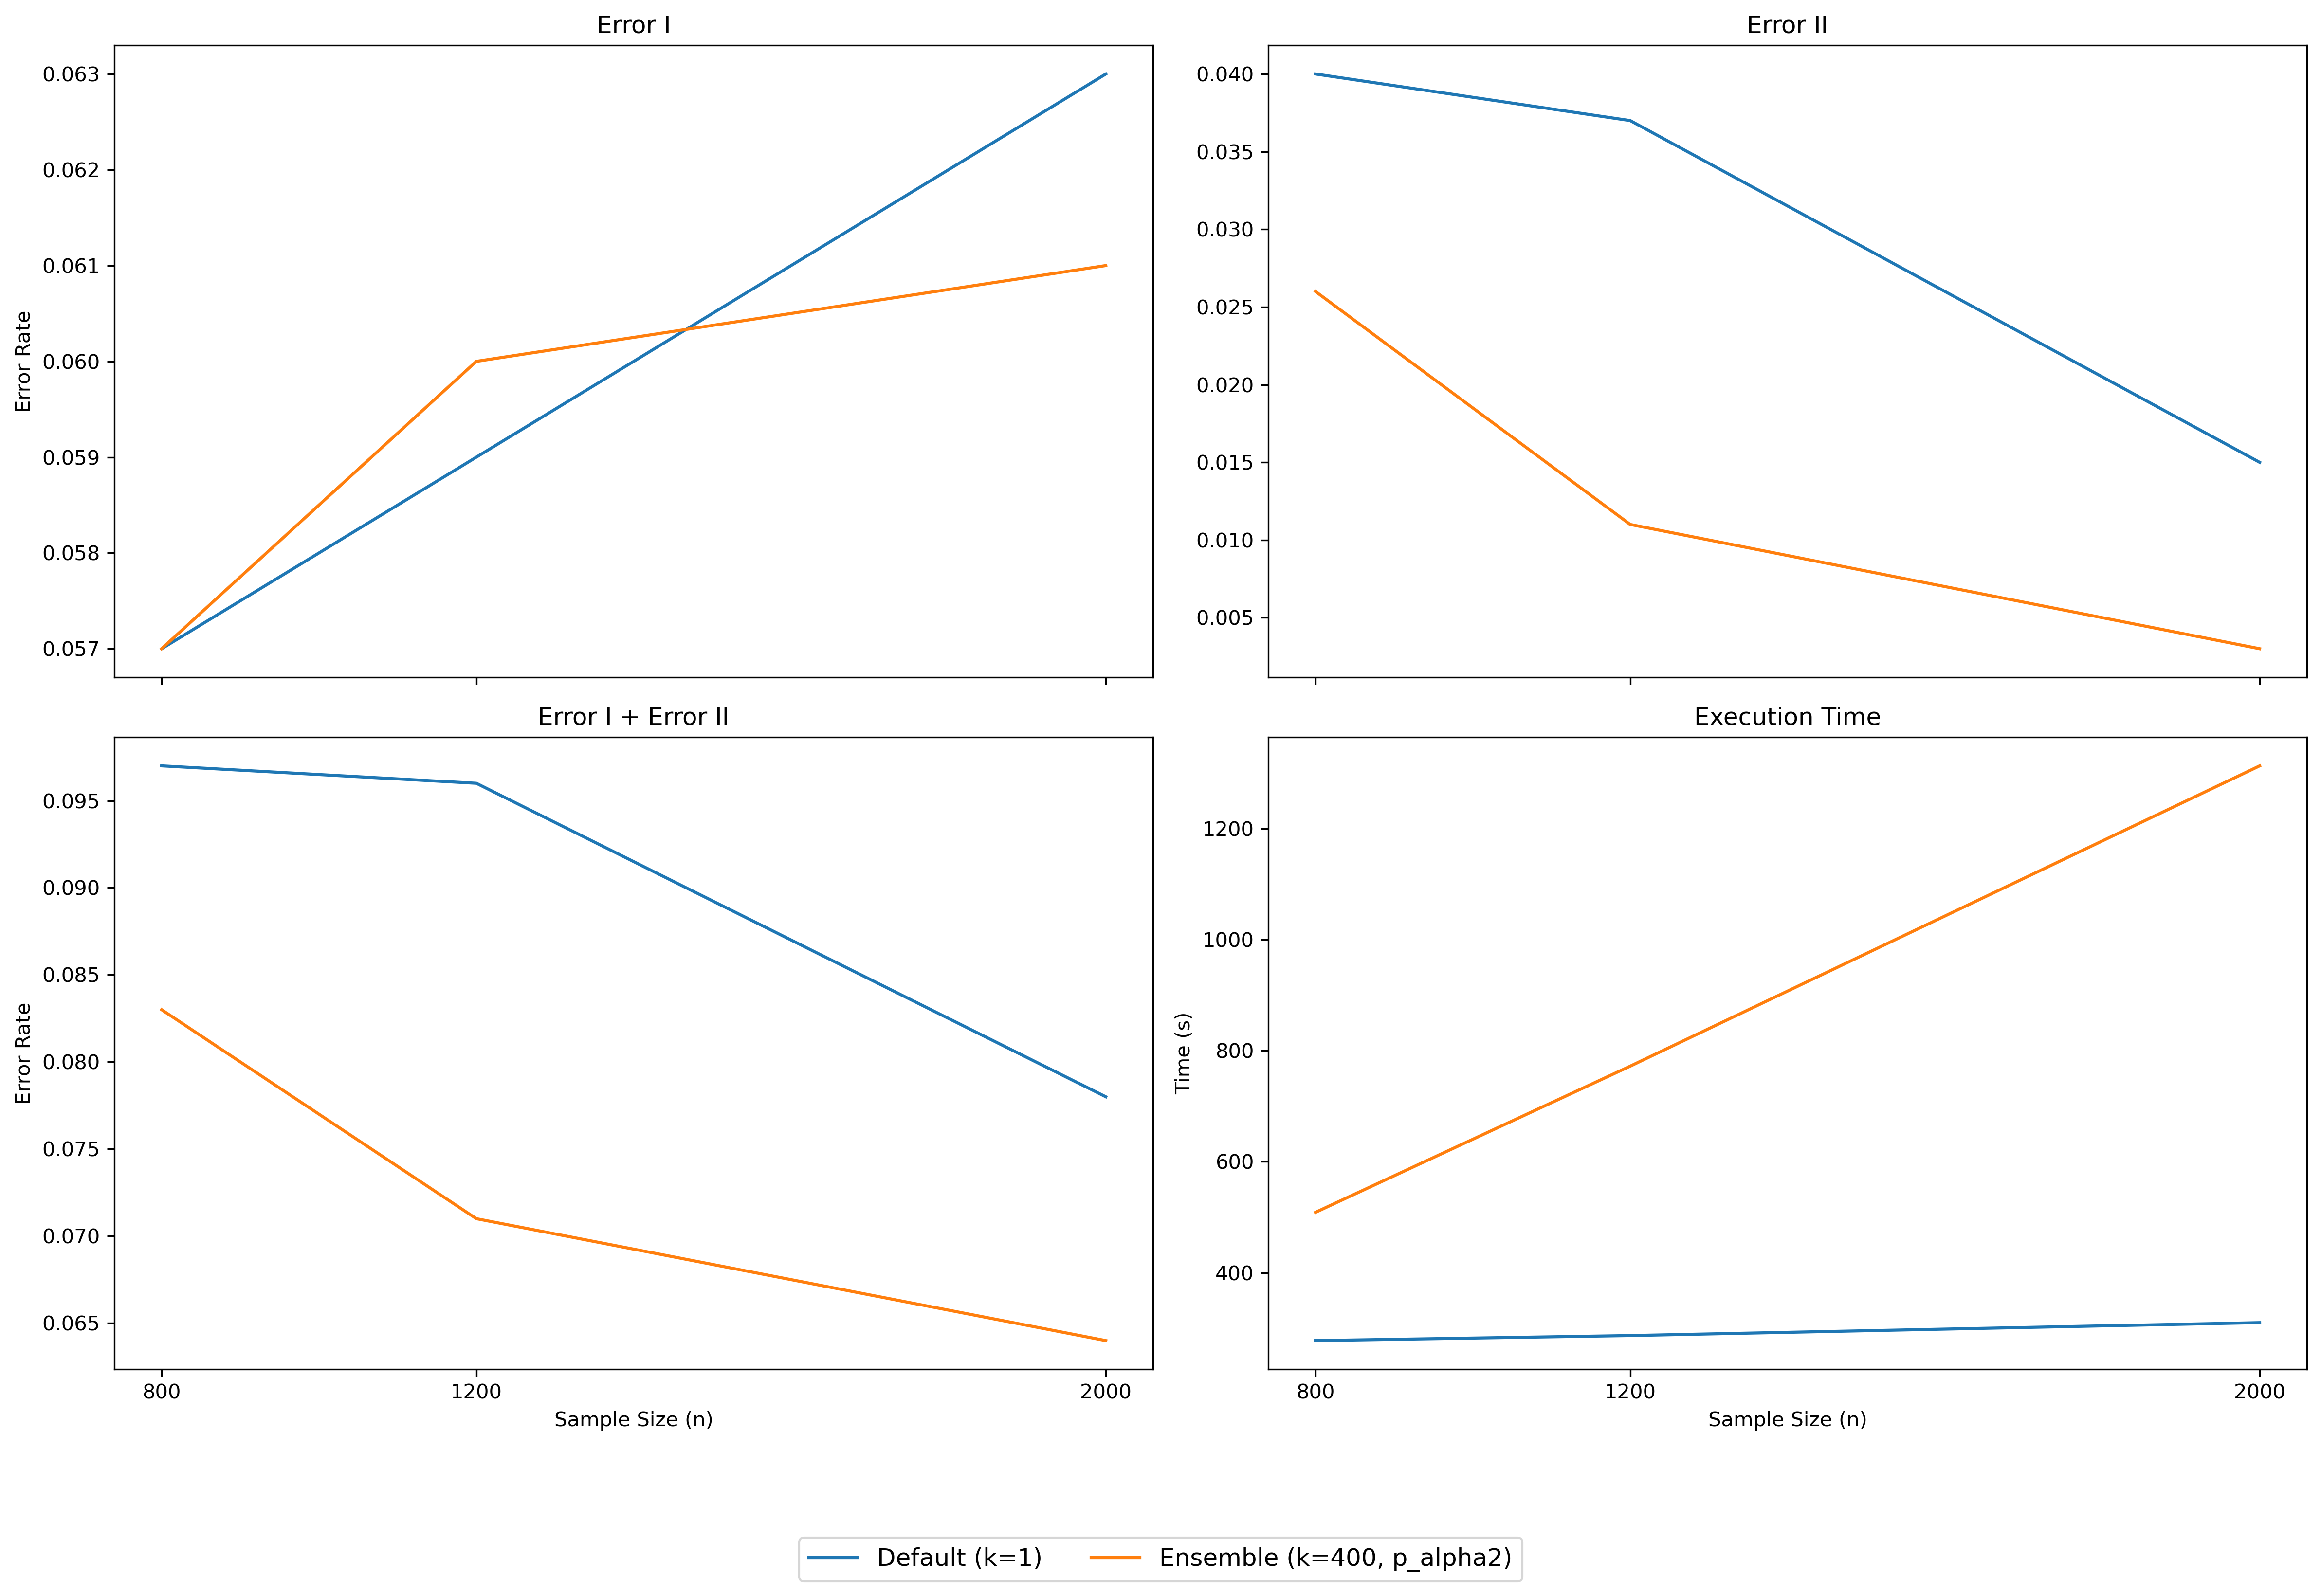

[[[0.057, 0.059, 0.063],
  [0.04, 0.037, 0.015],
  [277.84483003616333, 286.91127705574036, 310.1512987613678]],
 [[0.057, 0.06, 0.061],
  [0.026, 0.011, 0.003],
  [508.7704792022705, 771.9957439899445, 1312.7296259403229]]]

In [4]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=1,z_dis='gaussian',noise_dis='gaussian',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [05:03<00:00,  3.29it/s]


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [20:51<00:00,  1.25s/it]


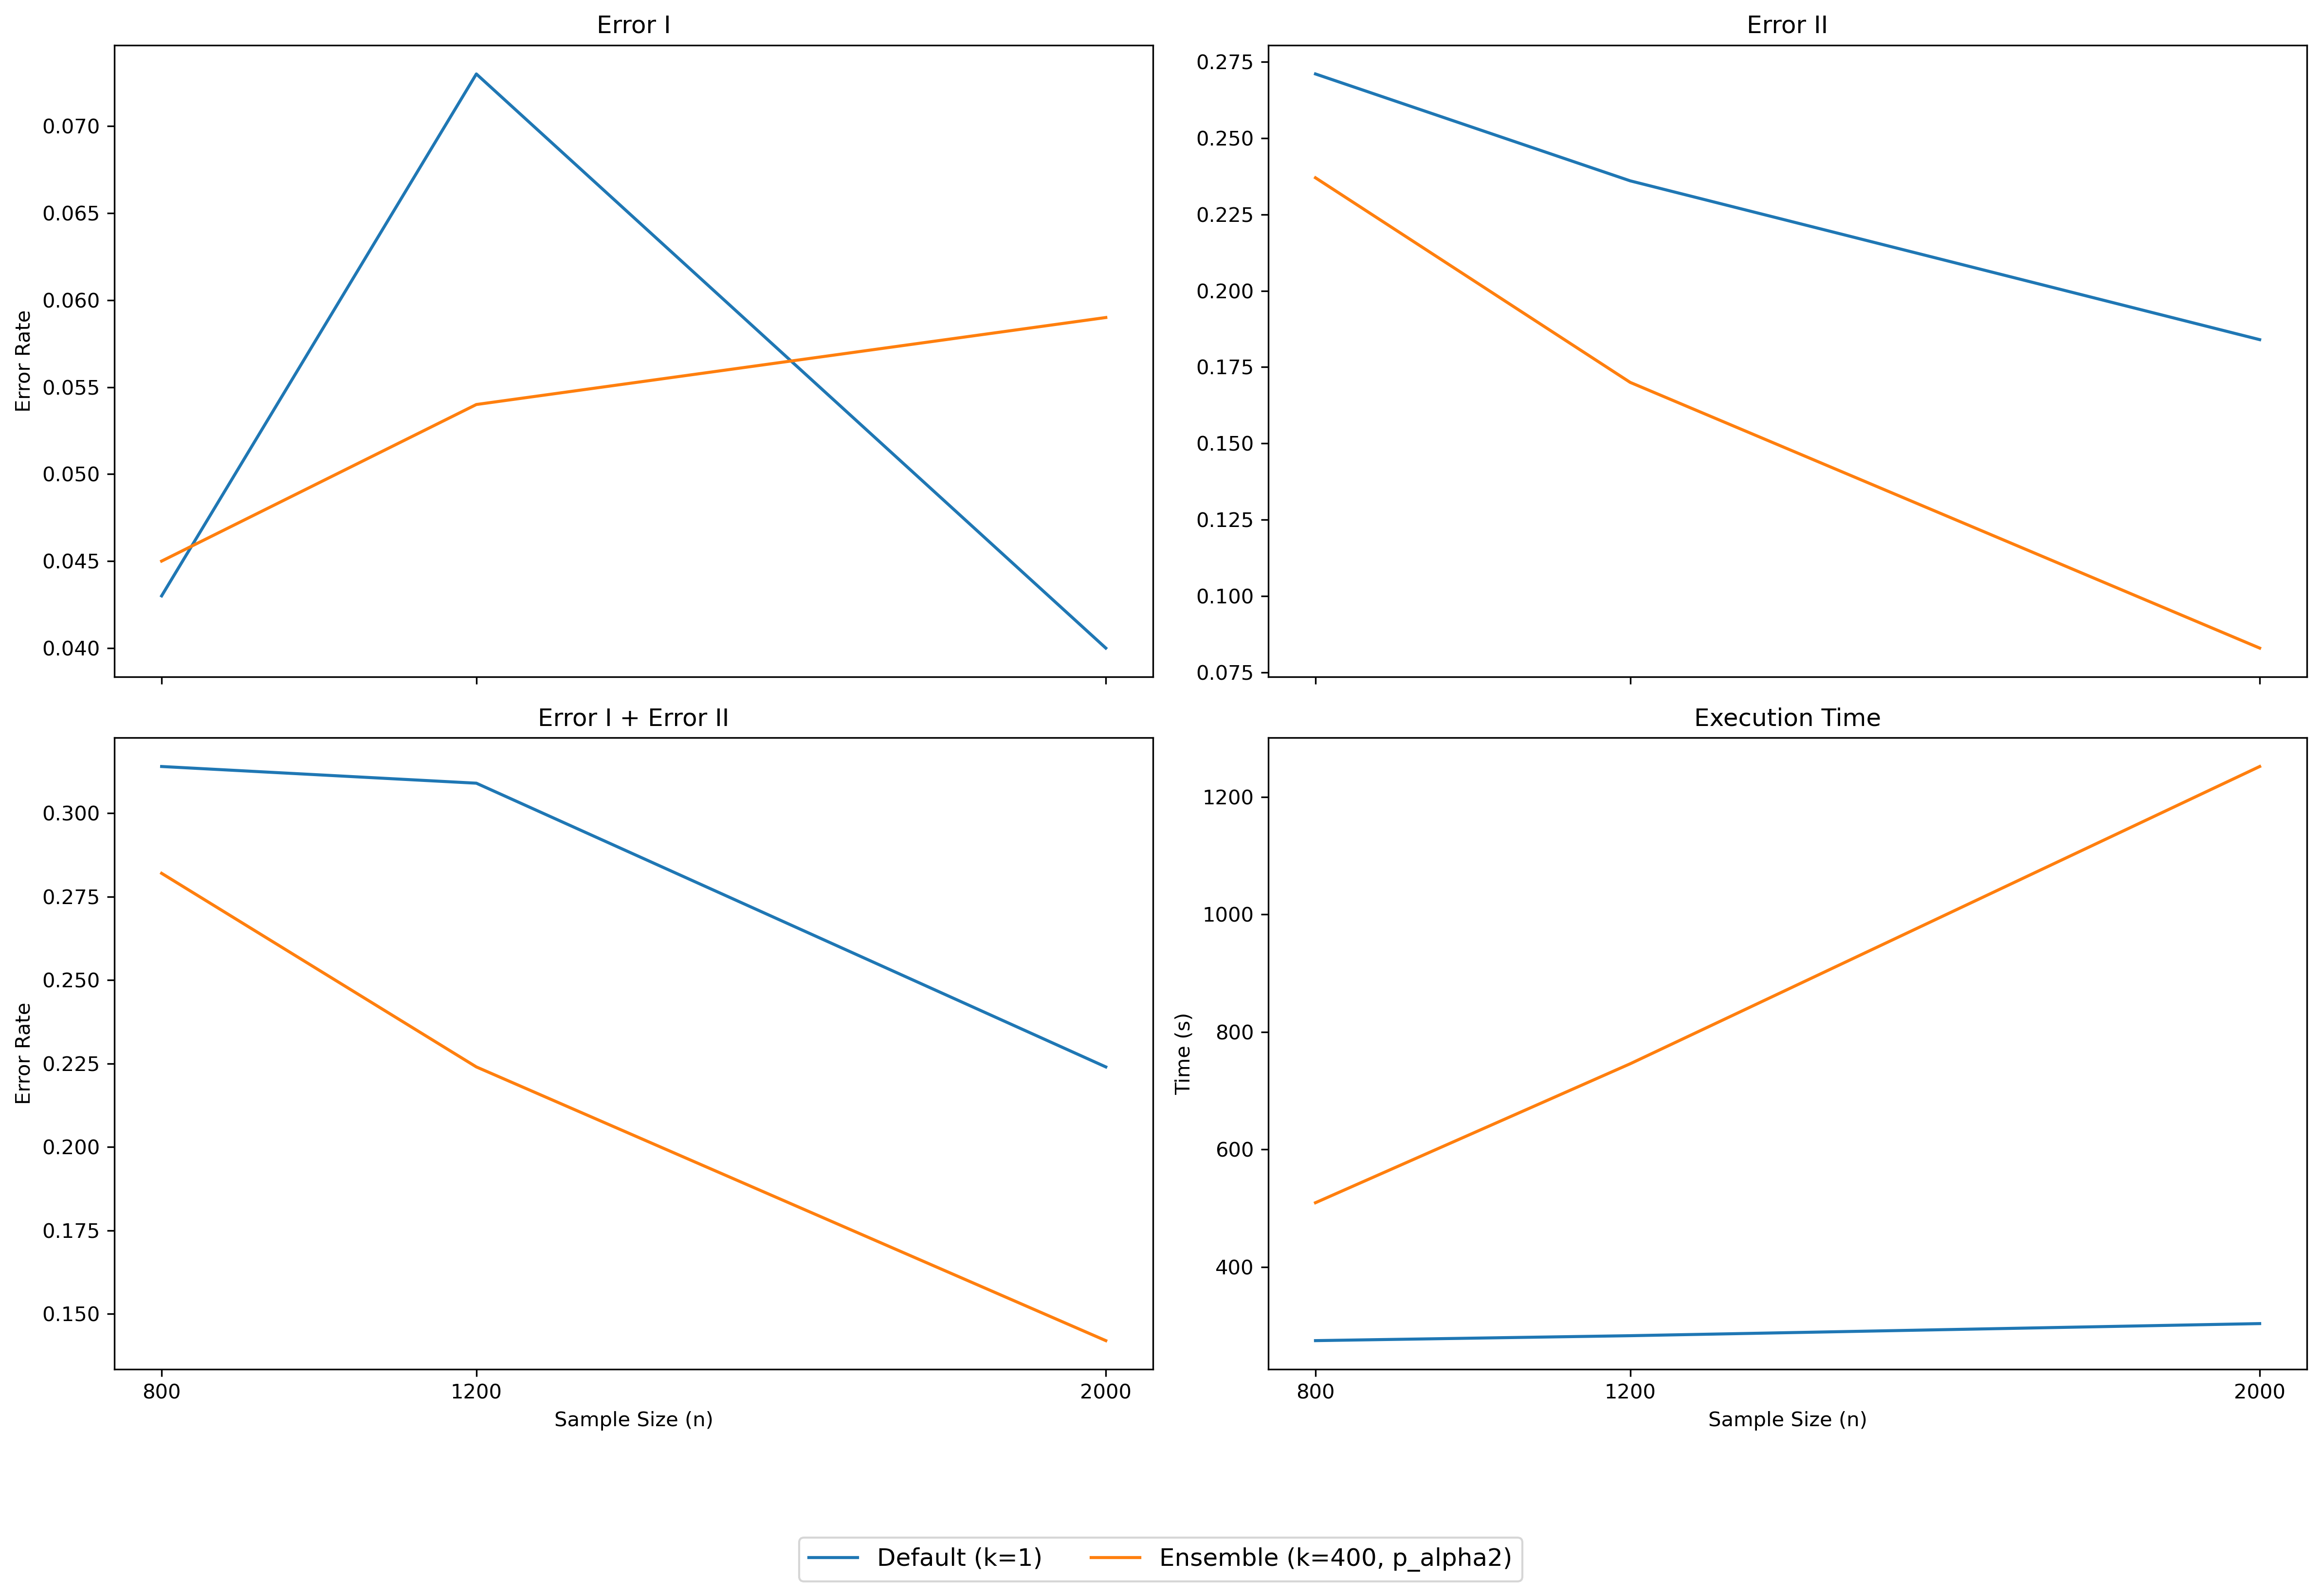

[[[0.043, 0.073, 0.04],
  [0.271, 0.236, 0.184],
  [274.56332302093506, 282.9566538333893, 303.5717668533325]],
 [[0.045, 0.054, 0.059],
  [0.237, 0.17, 0.083],
  [509.3405818939209, 745.904305934906, 1251.9347839355469]]]

In [5]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=1,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [04:58<00:00,  3.35it/s]


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [20:52<00:00,  1.25s/it]


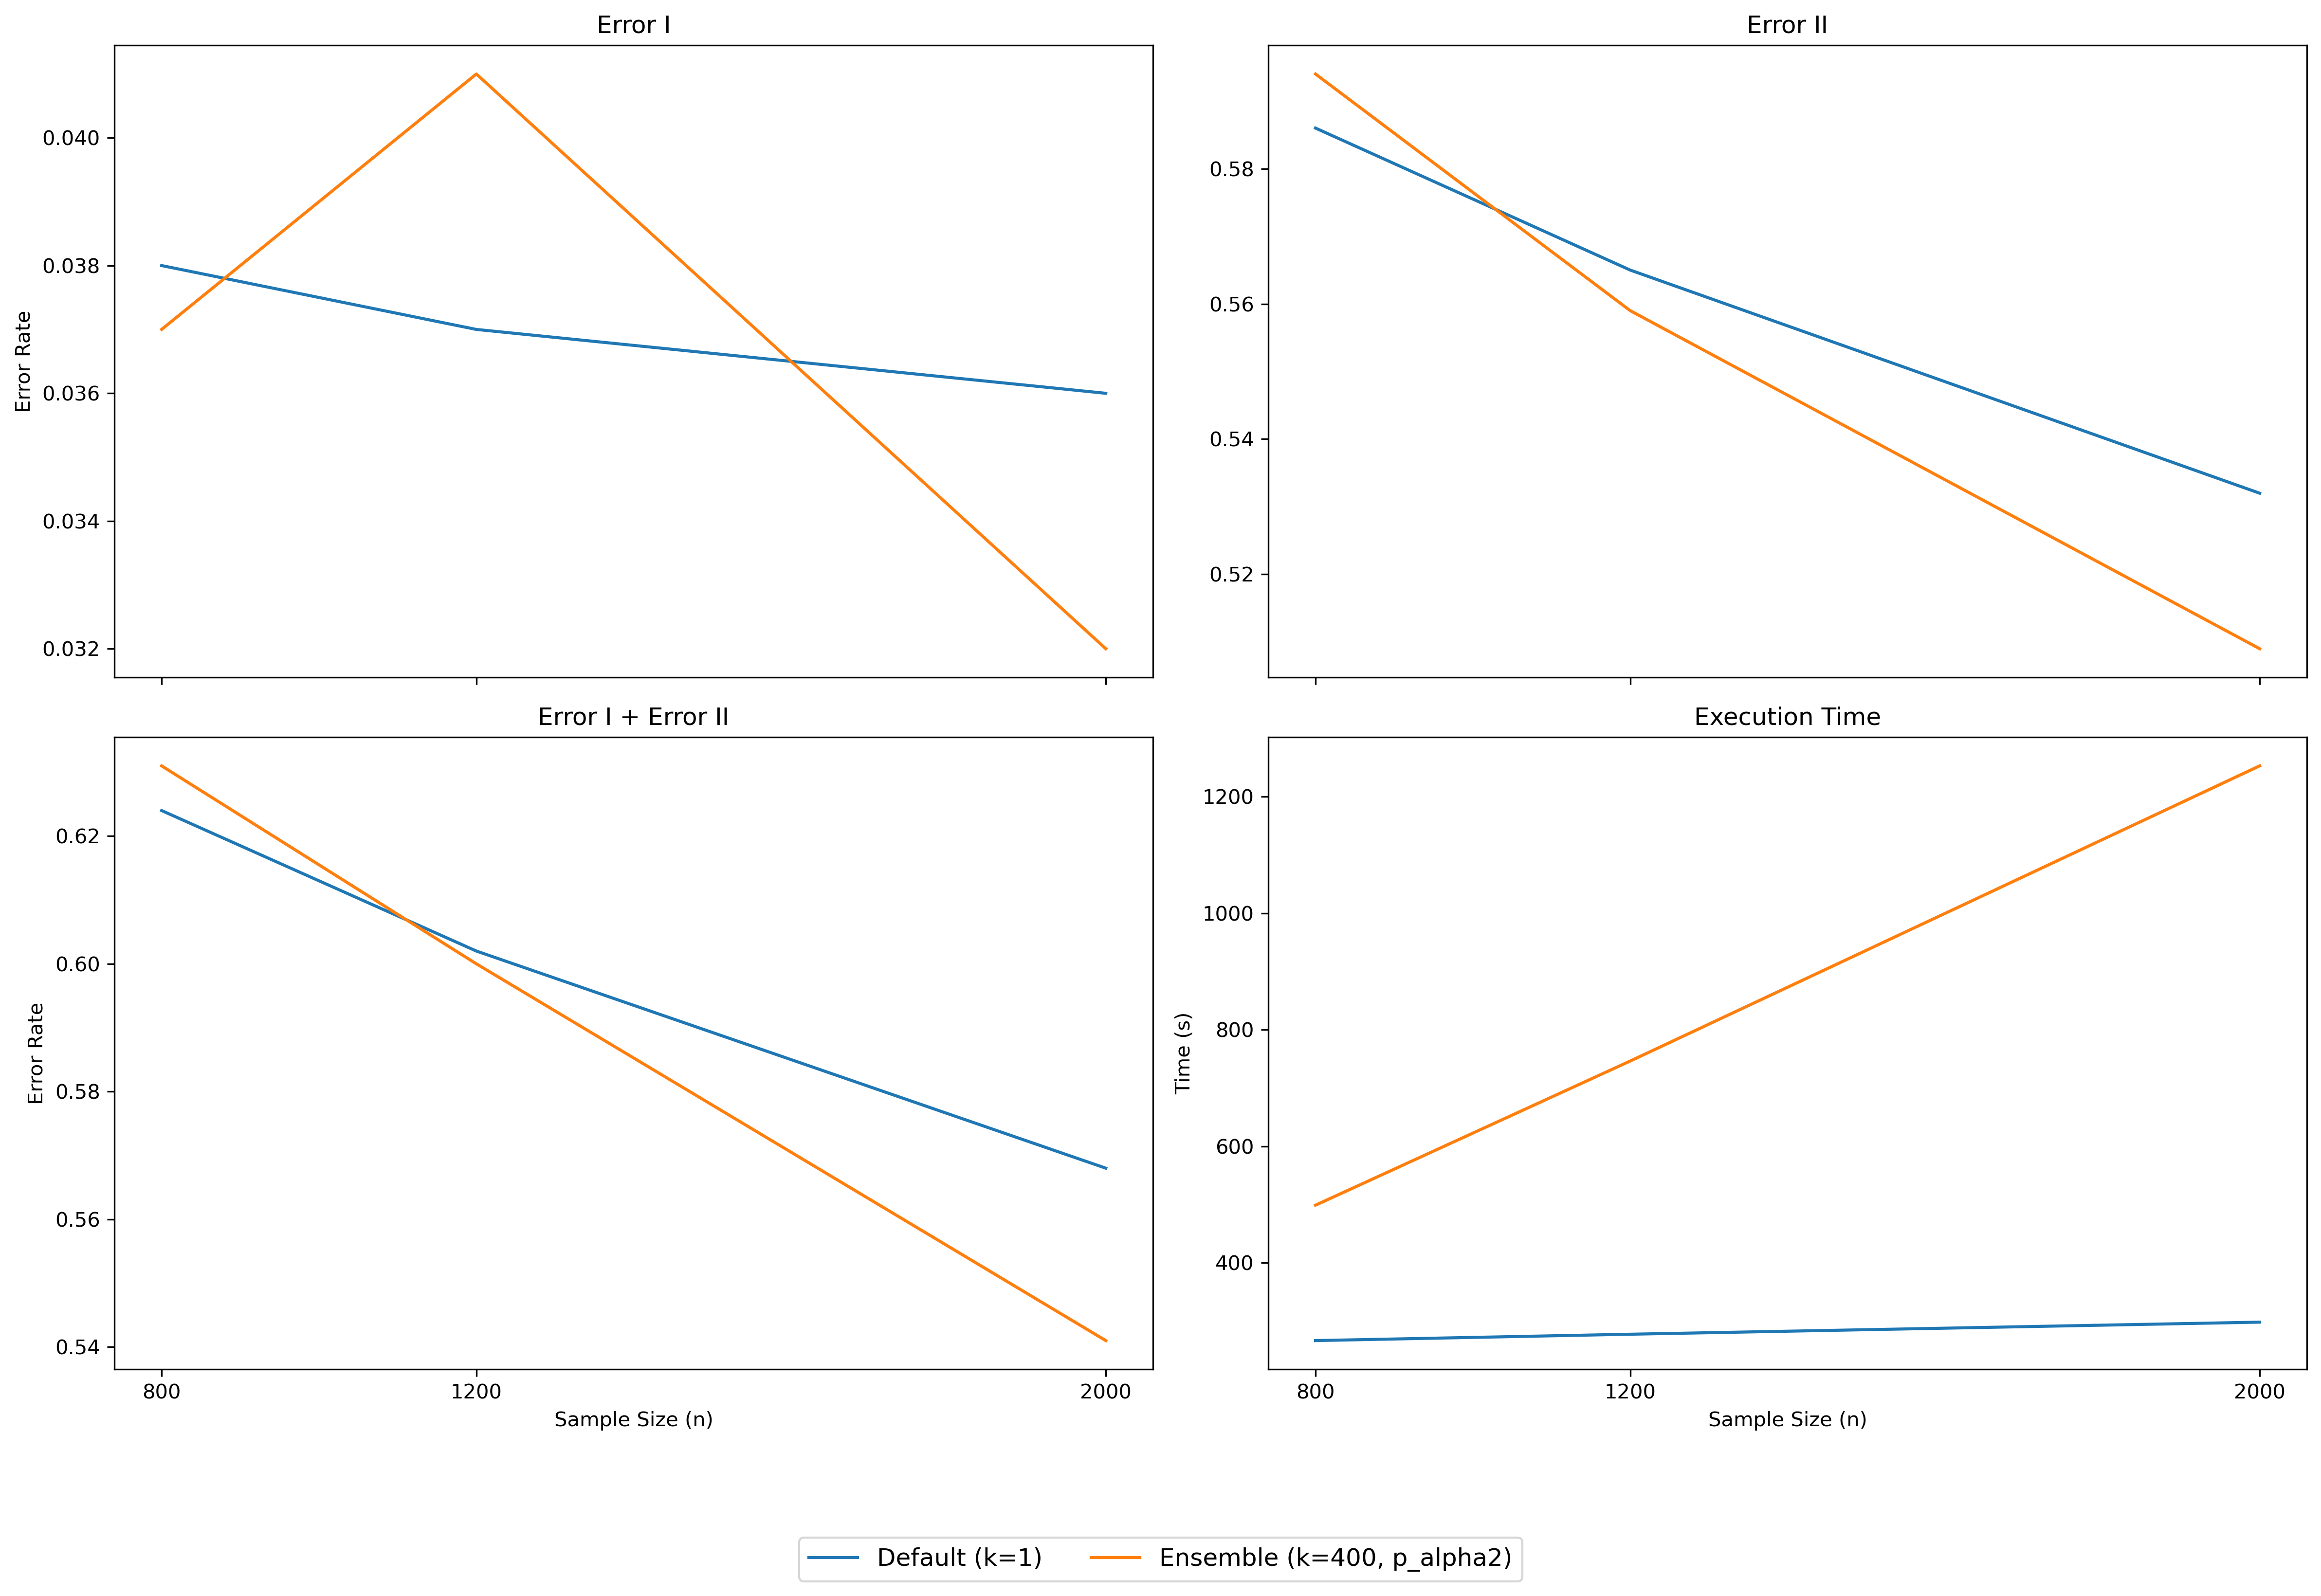

[[[0.038, 0.037, 0.036],
  [0.586, 0.565, 0.532],
  [266.6249158382416, 277.56003284454346, 298.2697868347168]],
 [[0.037, 0.041, 0.032],
  [0.594, 0.559, 0.509],
  [498.8962302207947, 746.1913101673126, 1252.5621240139008]]]

In [6]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=1,z_dis='gaussian',noise_dis='cauchy',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [05:09<00:00,  3.23it/s]


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [20:56<00:00,  1.26s/it]


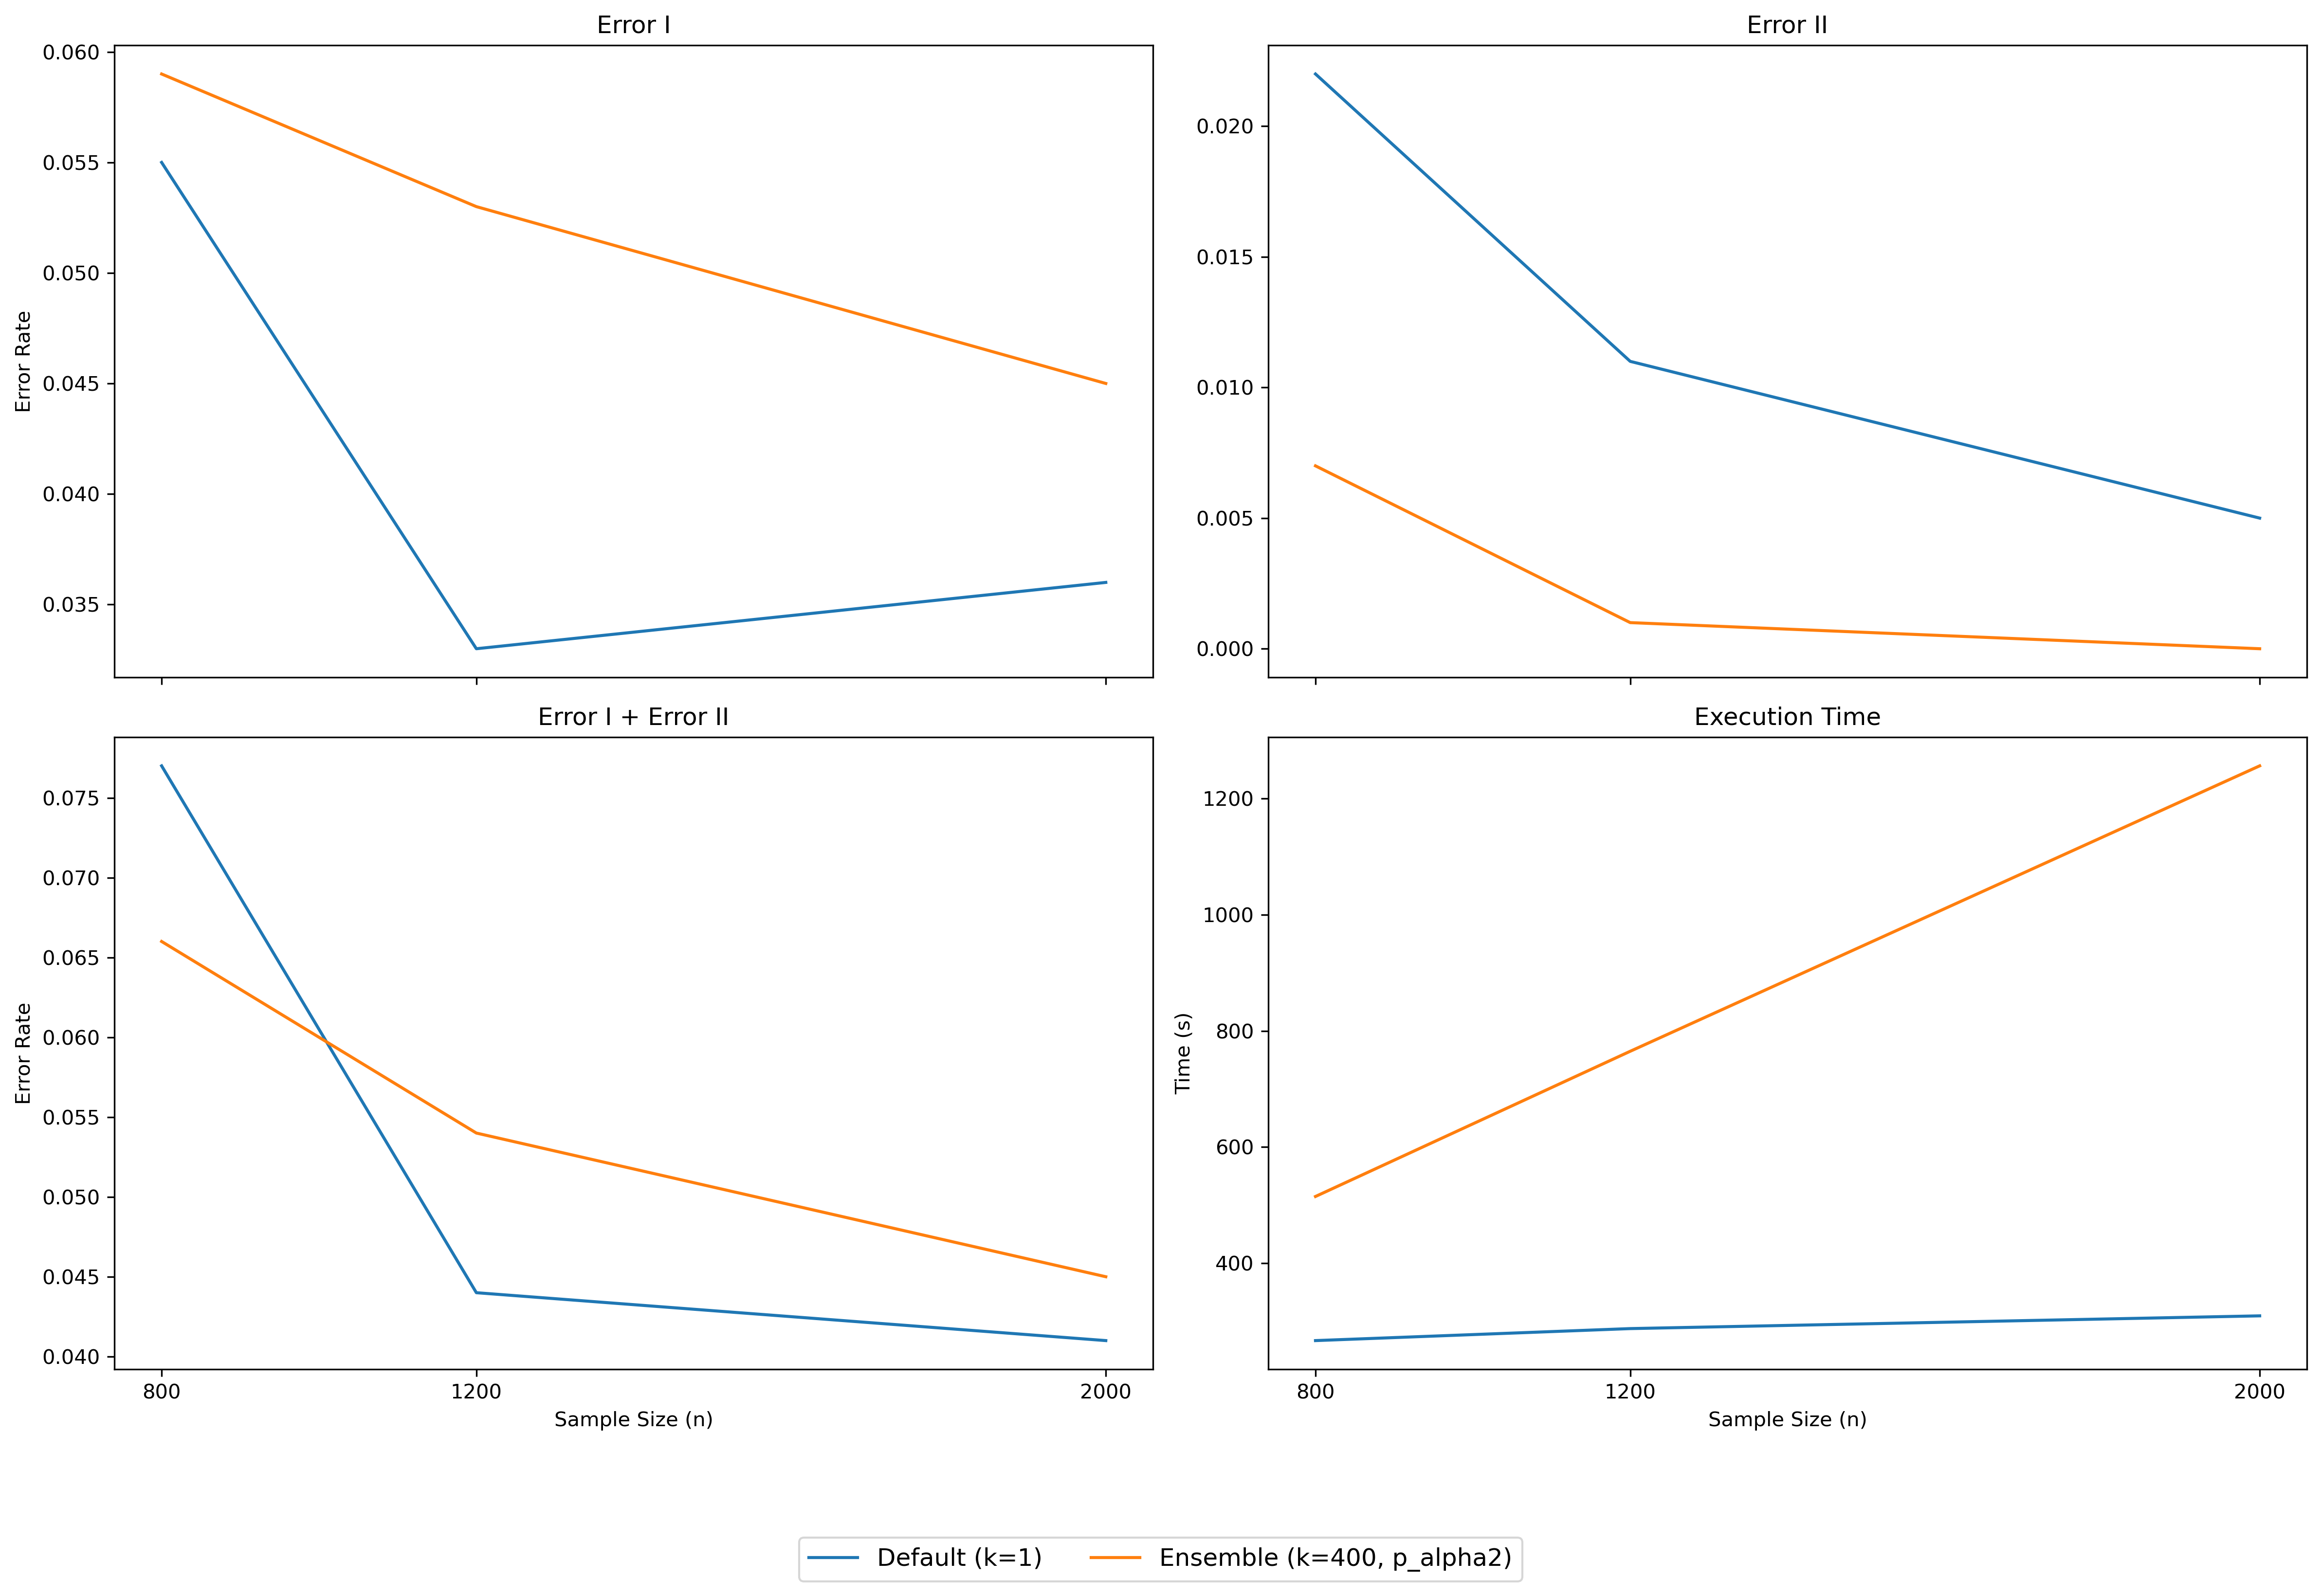

[[[0.055, 0.033, 0.036],
  [0.022, 0.011, 0.005],
  [266.8426480293274, 287.5114712715149, 309.4453499317169]],
 [[0.059, 0.053, 0.045],
  [0.007, 0.001, 0.0],
  [514.967334985733, 764.9639077186584, 1256.3653309345245]]]

In [7]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=1,z_dis='uniform',noise_dis='gaussian',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [04:57<00:00,  3.36it/s]


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [20:52<00:00,  1.25s/it]


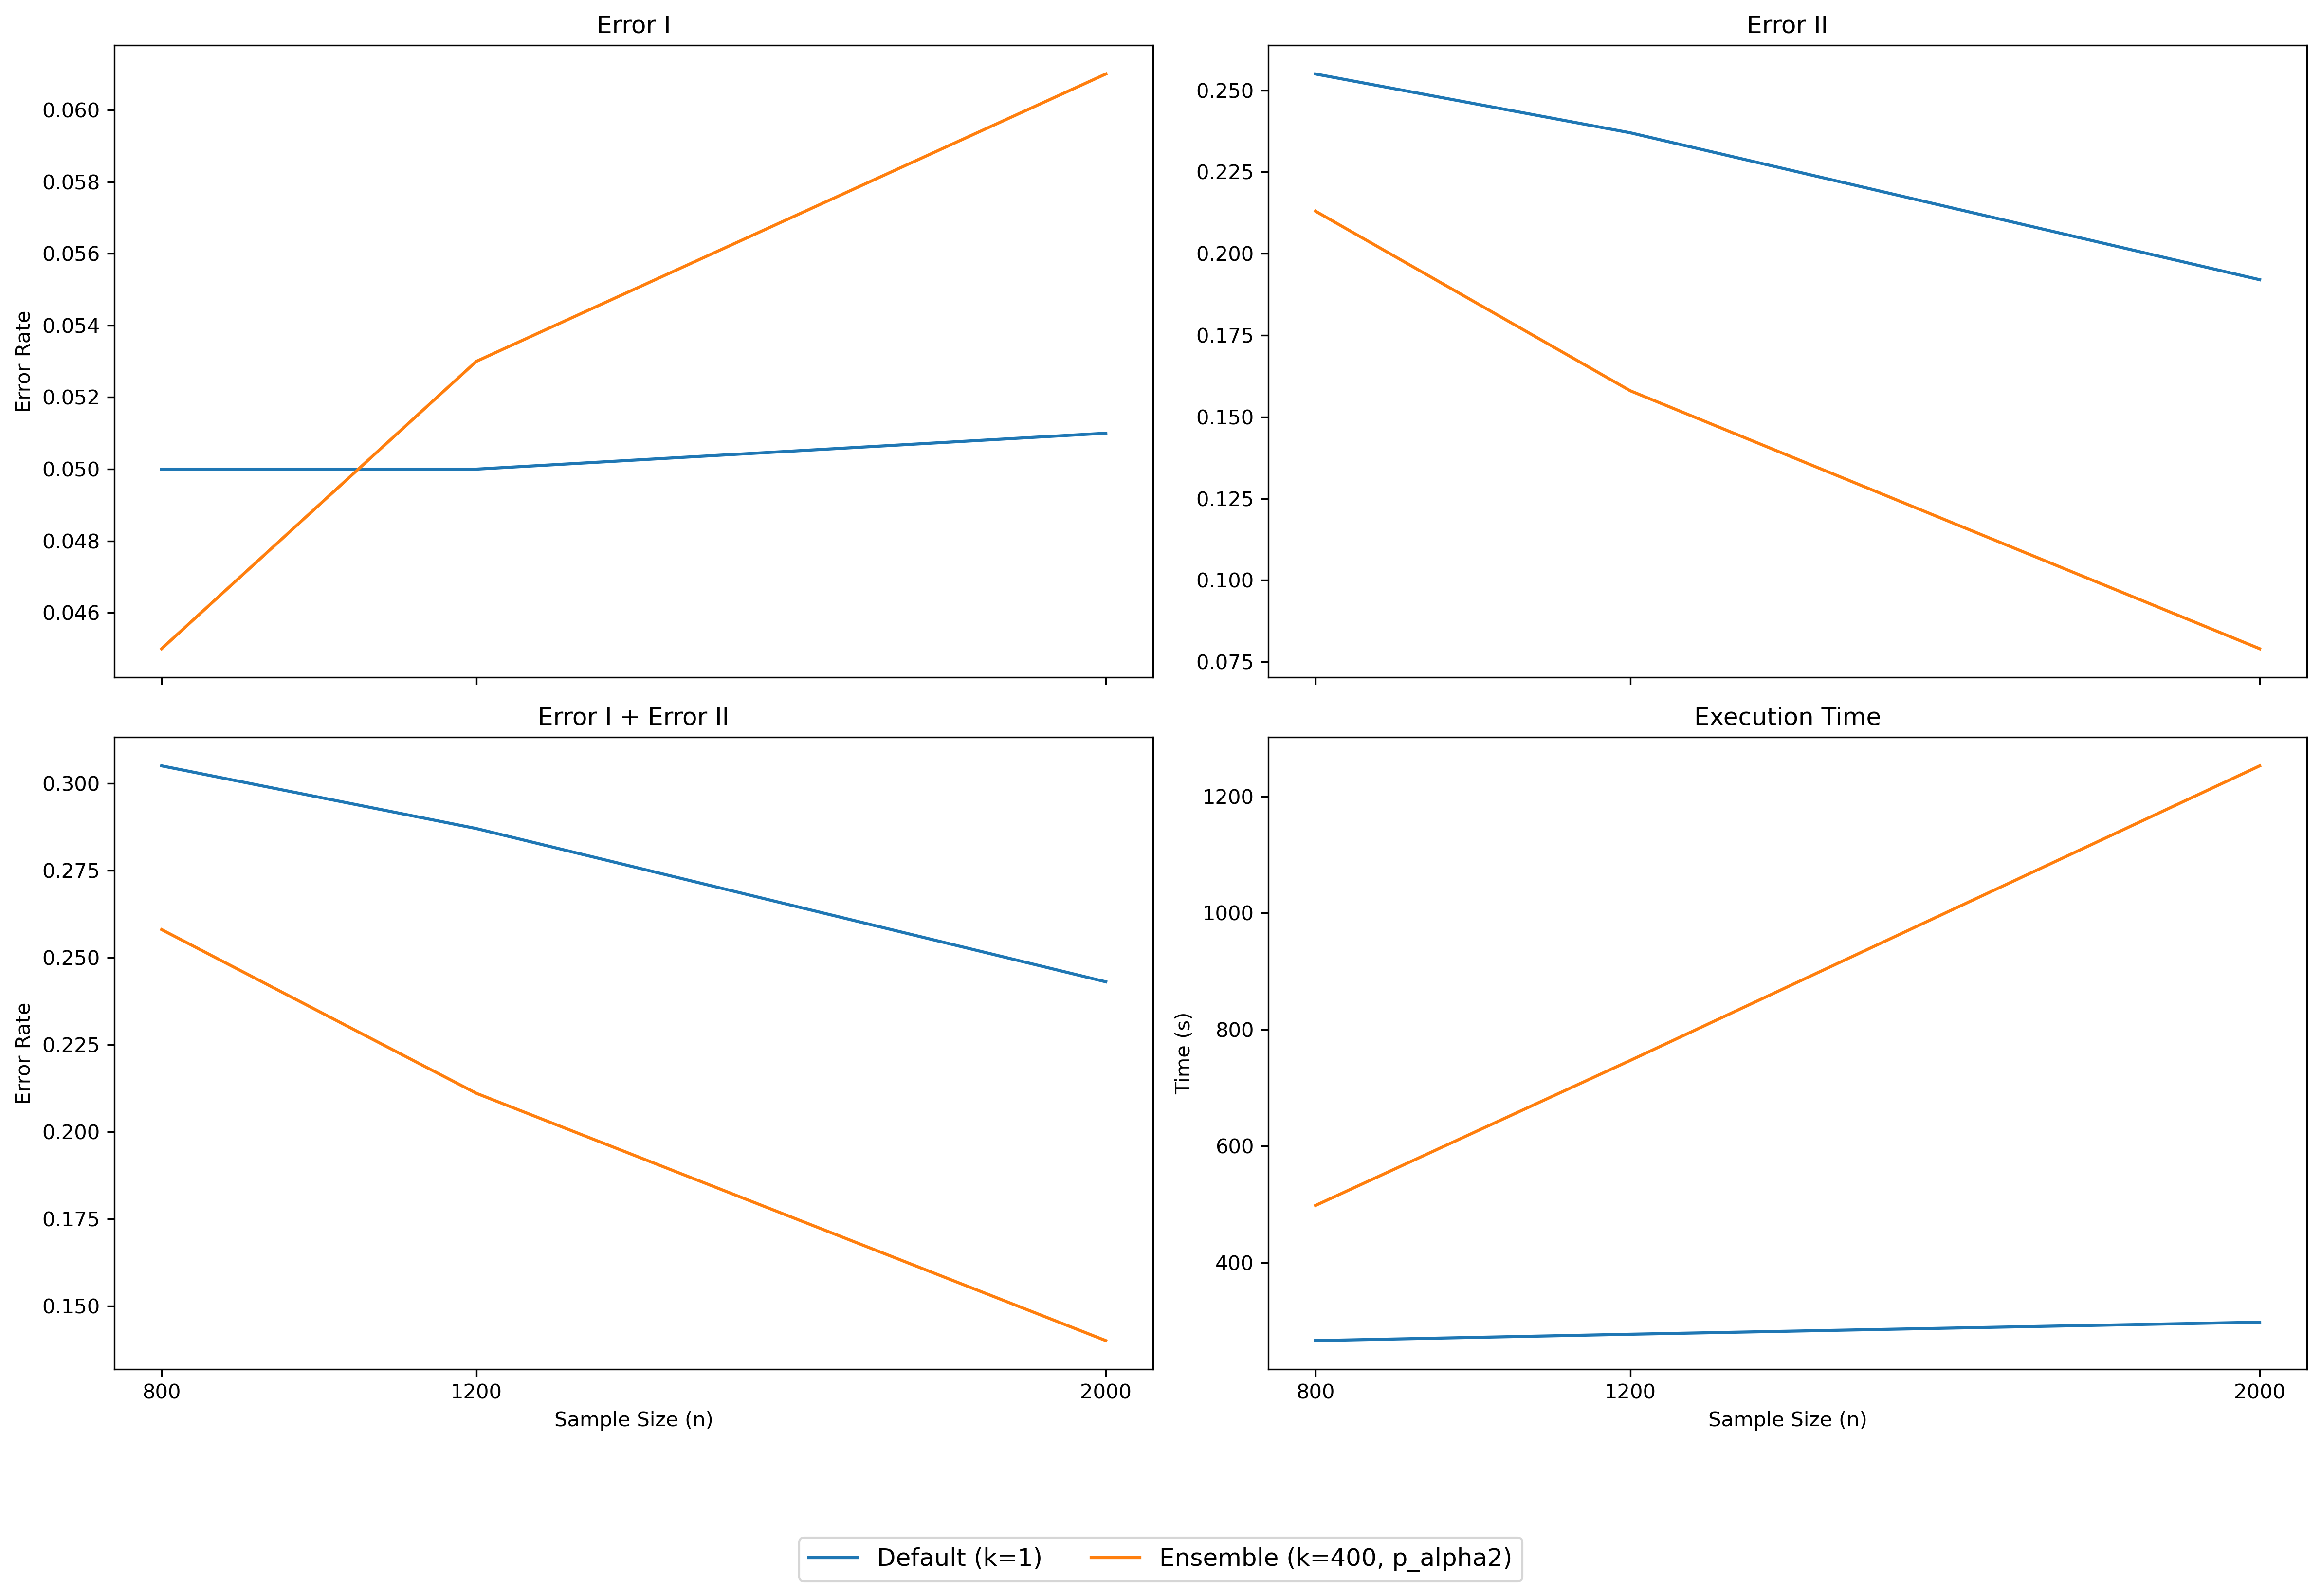

[[[0.05, 0.05, 0.051],
  [0.255, 0.237, 0.192],
  [266.3236081600189, 277.26130199432373, 297.92338705062866]],
 [[0.045, 0.053, 0.061],
  [0.213, 0.158, 0.079],
  [498.1163218021393, 746.9085869789124, 1252.3197271823883]]]

In [8]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=1,z_dis='uniform',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [04:57<00:00,  3.36it/s]


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [20:52<00:00,  1.25s/it]


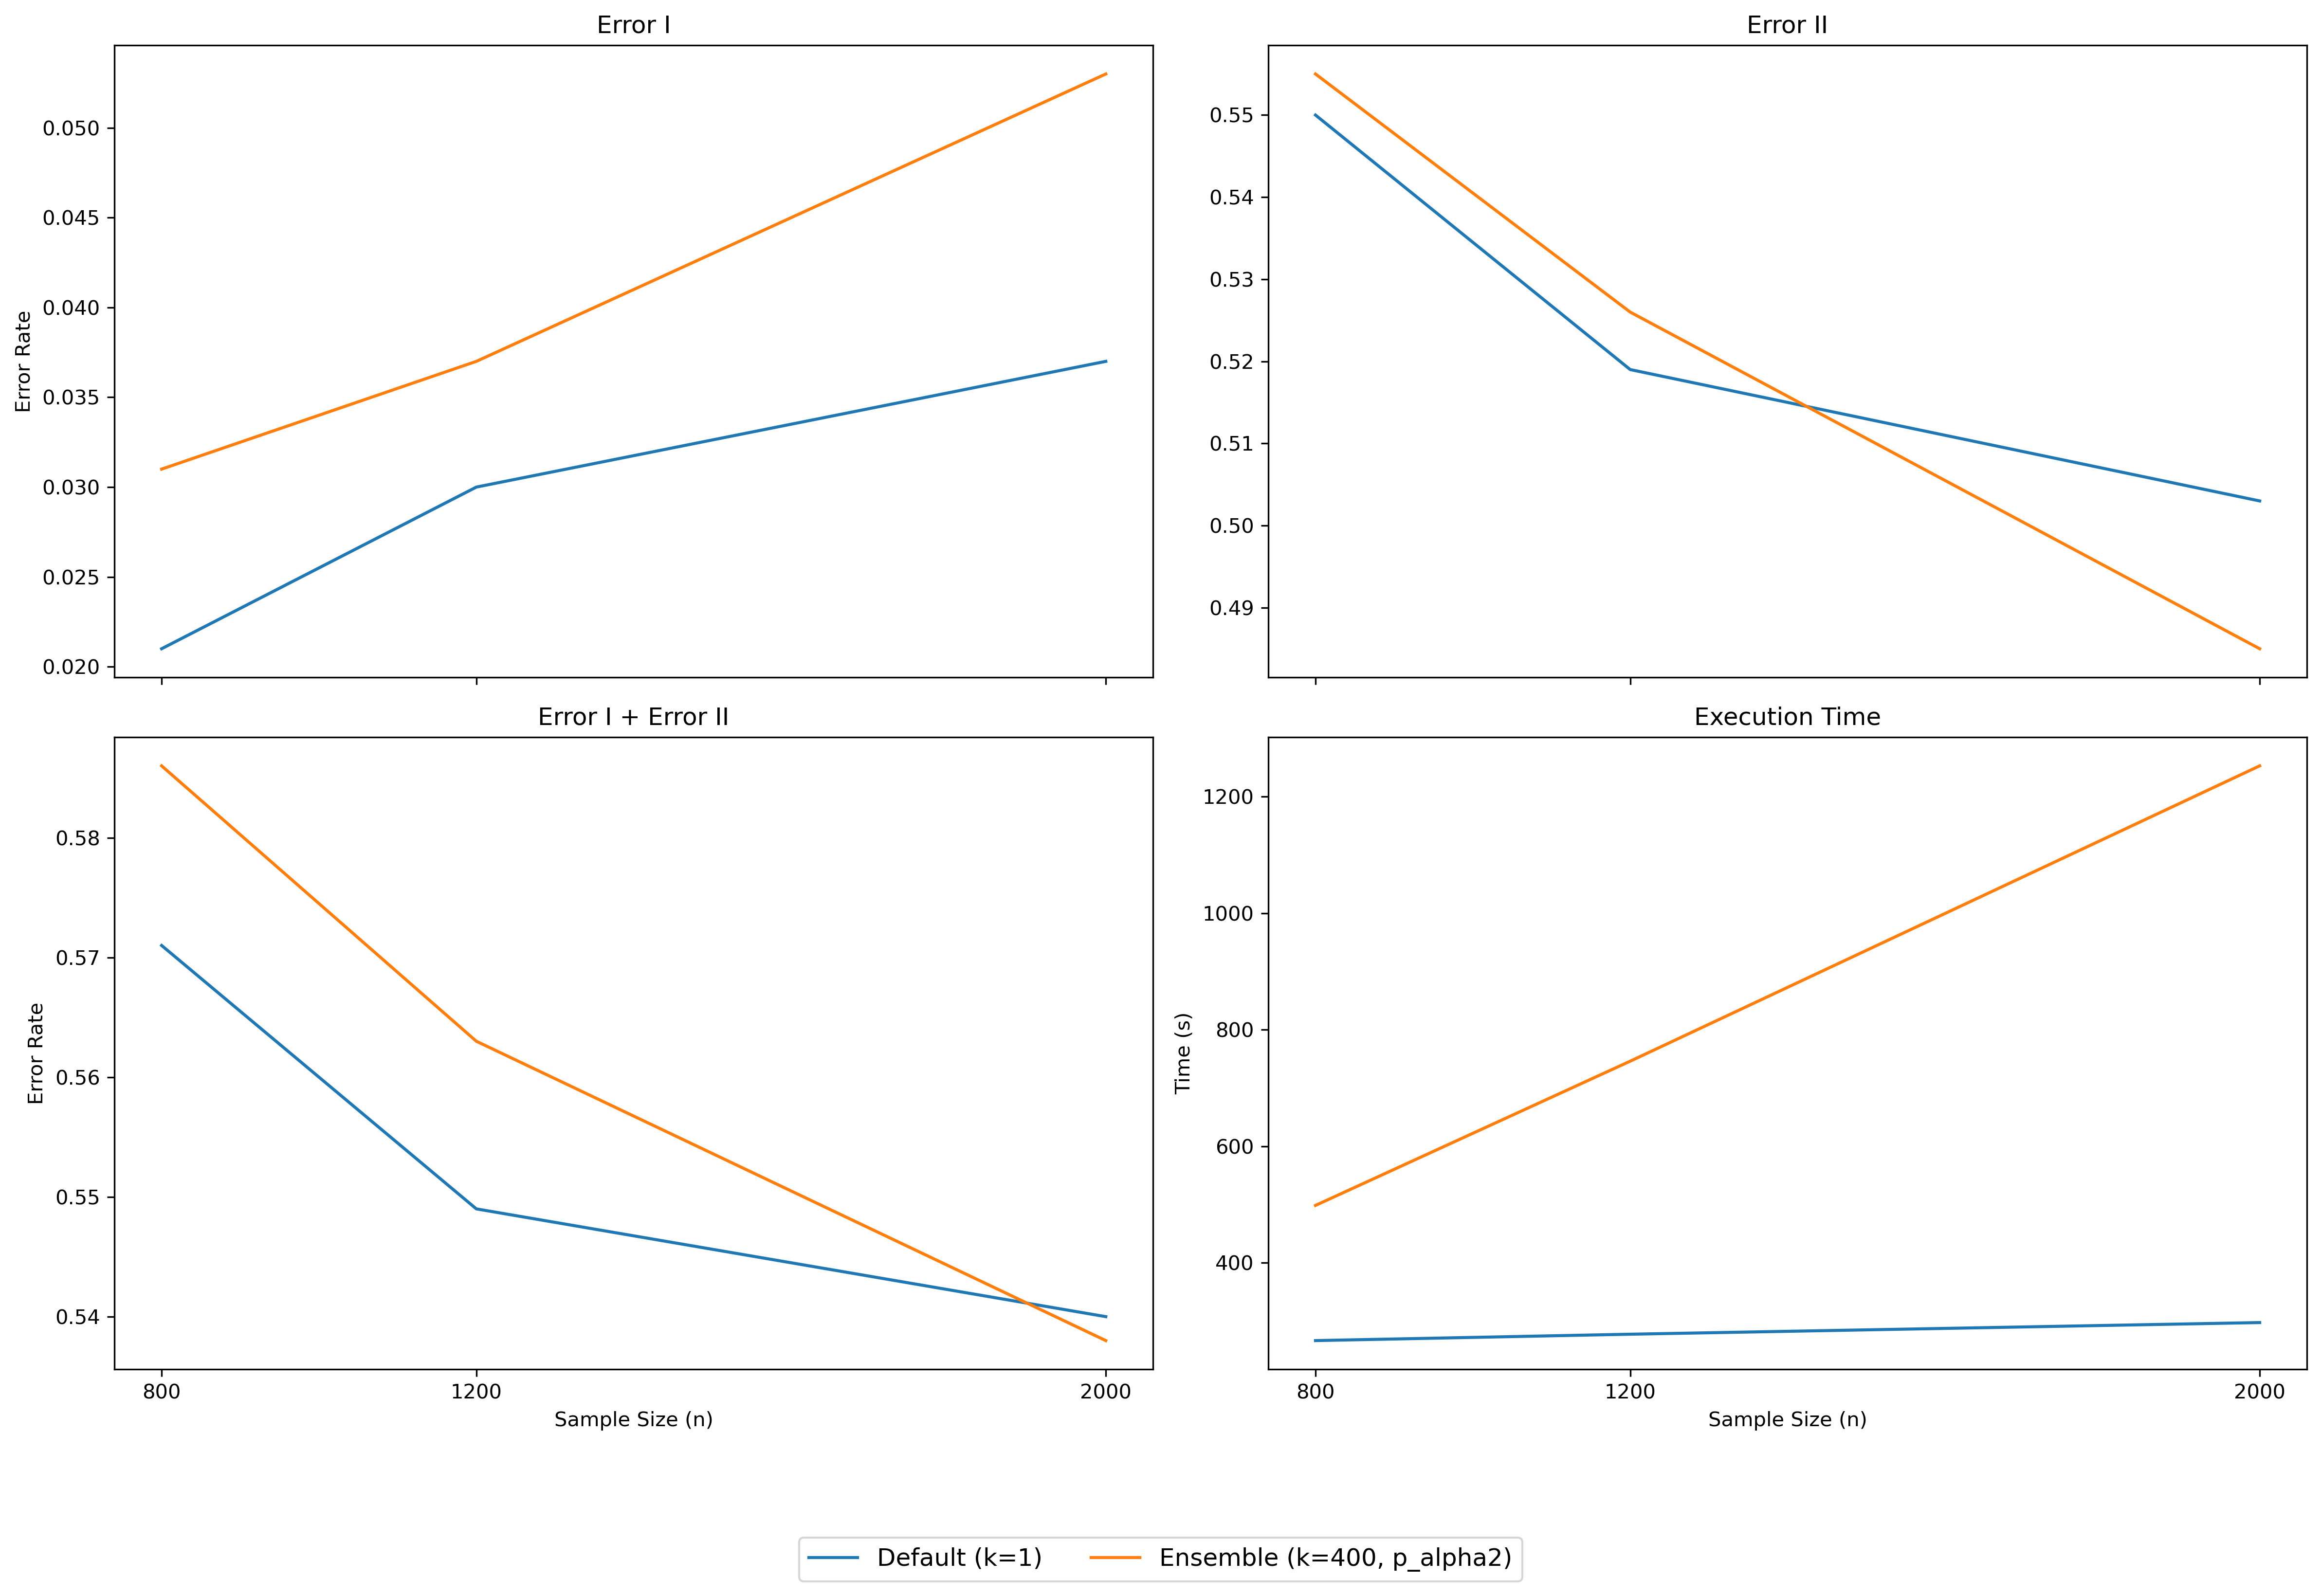

[[[0.021, 0.03, 0.037],
  [0.55, 0.519, 0.503],
  [266.452486038208, 277.40338802337646, 297.3895688056946]],
 [[0.031, 0.037, 0.053],
  [0.555, 0.526, 0.485],
  [498.4966289997101, 746.0592498779297, 1252.9736161231995]]]

In [9]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=1,z_dis='uniform',noise_dis='cauchy',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results